# **Comprobación estacionalidad**  
Objetivo: Comprobar si la serie es estacionaria. Si no lo es, convertirla a estacionaria

# Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Funciones

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    """Permite pintar una serie según eje x (tiempo) e y (series) 
      con punto de inicio y fin"""
      
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)

# Creación serie temporal sintética
En este notebook podemos ver paso a paso la construcción de la serie sintética https://colab.research.google.com/drive/1ovwzq8HovMnP8yEcnltTqZ8yL3JeFrQB#scrollTo=WFc-PIuTfe5B

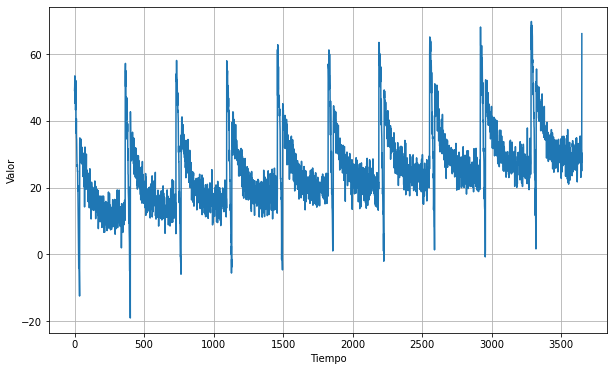

In [3]:
def trend(time, slope=0):
    """Creación de una linea recta como tendencia 
    por un tiempo determinado(time) y una pendiente(slope)"""
    return slope * time

def seasonal_pattern(season_time):
    """Patrón arbitrario estacional"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repite el mismo patrón cada cierto período (amplitude)"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    """Ruido aleatorio"""
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

#Definición del tiempo de la serie => 10 años
time = np.arange(10 * 365 + 1, dtype="float32")

#Variables de la serie
baseline = 10     #base de inicio a 10
amplitude = 40    #se repite la estacionalidad cada 40 puntos
slope = 0.005     #pendiente de la tendencia
noise_level = 3   #nivel de ruido

# Creación de la serie
# 1.- Tendencia
series = trend(time, slope)
# 2.- Añadimos la estacionalidad
series += baseline + seasonality(time, period=365, amplitude=amplitude)
# 3.- Añadimos el ruido
series += noise(time, noise_level, seed=51)

#Pintamos la serie
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# Comprobación estacionariedad datos

### Método 1: Media y varianza
Tomamos la mitad de la serie en dos variables y calculamos la media de cada parte

In [4]:
split = round(len(series)/2)
split

1826

In [5]:
X1,X2 = series[0:split],series[split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()

In [6]:
mean1

20.850437

In [7]:
mean2

29.994253

Graficamos la media, varianza y un histograma de distribución de valores

/home/m315/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



To check Stationary 


Before difference mean and Variance

mean1 = 20.850437 ,mean2 = 29.994253
var1 = 92.756027 ,var2 = 92.682320


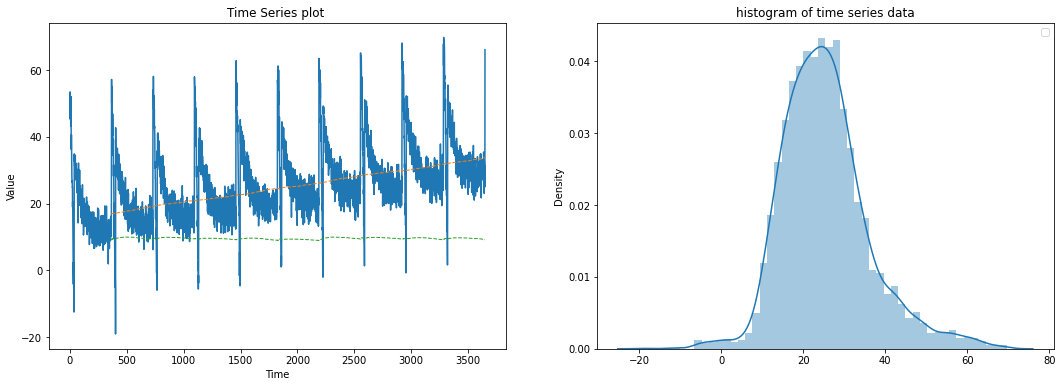

In [8]:
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))

fig ,ax = plt.subplots(1,2,figsize = (18,6))

plt.title("histogram of time series data")

ax[0].plot(series, label='series')
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")

df_series = pd.DataFrame(series, columns=['value'])
mean_12 = df_series['value'].rolling(365).mean()
std_12 = df_series['value'].rolling(365).std()
ax[0].plot(mean_12,'--', linewidth=1, label='mean')
ax[0].plot(std_12,'--', linewidth=1, label='std')

sns.distplot(series,ax =ax[1])
plt.legend(loc='best')
plt.show()

No es estacionaria porque la media es distinta entre las dos mitades de la serie

### Usando Augmented Dickey Fuller Test 

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.078591
p-value: 0.000015



Se toma la hipótesis que será no estacionaria. Se refuta la hipótesis si el valor p_value no es significante, con un sobre p_value inferior a 0.05. Entonces es estacionaria

## Conversión a estacionaria  


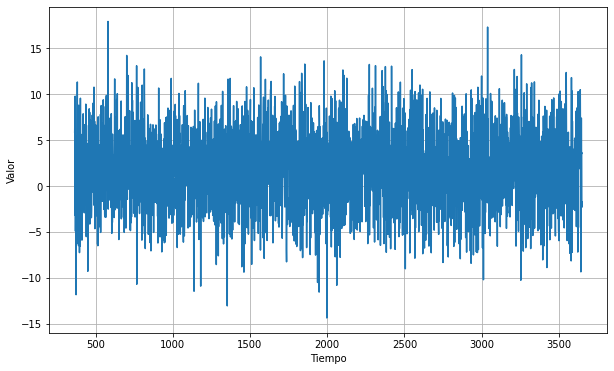

In [10]:
diff_series = (series[365:] - series[:-365])  #desde el primer día del segundo año eliminanos su homologo -365
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)

#en pandas hay un método diff para aplicar diferencia

In [14]:
print(series[365:] - series[:-365])
print(series[365:])

array([ 5.870739 ,  6.947109 , -3.1955376, ...,  3.658821 , -2.3209229,
       -1.735466 ], dtype=float32)


To check Stationary 

\After difference mean and Variance

mean1 = 1.824645 ,mean2 = 1.891898
var1 = 17.528206 ,var2 = 17.968950


/home/m315/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


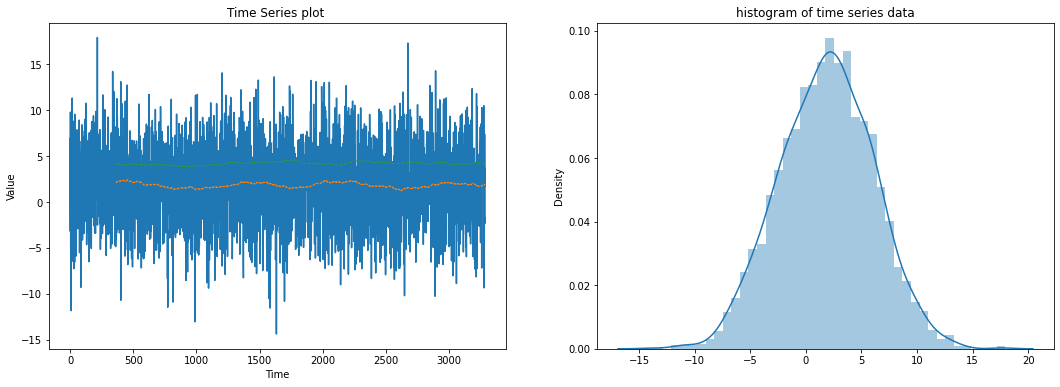

In [11]:
split = round(len(diff_series)/2)

X1,X2 = diff_series[0:split],diff_series[split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()

print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\After difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))

fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(diff_series)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(diff_series,ax =ax[1])

df_series = pd.DataFrame(diff_series, columns=['value'])
mean_12 = df_series['value'].rolling(365).mean()
std_12 = df_series['value'].rolling(365).std()
ax[0].plot(mean_12,'--', linewidth=1, label='mean')
ax[0].plot(std_12,'--', linewidth=1, label='std')

Ahora ya es estacionaria  
En formato dataframe, tenemos el método diff